In [1]:
import pandas as pd
import numpy as np
import gc
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile

In [2]:
pd.options.display.max_rows =999
pd.options.display.max_columns =999

In [3]:
sns.set()

In [4]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

In [5]:
import re
import urllib.request
import os

In [6]:
url = 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM'
dirname = '../data/'
path = dirname + 'file.zip'

os.makedirs(dirname, exist_ok=True)
if not os.path.isfile(path):
    response = requests.get(url)
    with open(path, "wb") as file:
        file.write(response.content)


zf = zipfile.ZipFile(path)
files = zf.namelist()

print(files)


['DeveloperSurvey2017QuestionaireCleaned.pdf', '__MACOSX/', '__MACOSX/._DeveloperSurvey2017QuestionaireCleaned.pdf', 'README_2017.txt', '__MACOSX/._README_2017.txt', 'survey_results_public.csv', 'survey_results_schema.csv']


In [7]:
survey_results = pd.read_csv( zf.open(files[5]))
survey_results.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [59]:
survey_results.shape

(51392, 154)

In [8]:
survey_schema =pd.read_csv( zf.open(files[6]))
survey_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [9]:
survey_results.Country

0                     United States
1                    United Kingdom
2                    United Kingdom
3                     United States
4                       Switzerland
5                       New Zealand
6                     United States
7                            Poland
8                          Colombia
9                            France
10                    United States
11                           Canada
12                   United Kingdom
13                          Germany
14                   United Kingdom
15                    United States
16                   United Kingdom
17                    United States
18                    United States
19                           Greece
20                           Brazil
21                   United Kingdom
22                           Israel
23                            Italy
24                          Belgium
25                    United States
26                            India
27                    United

In [10]:
from bs4 import BeautifulSoup

In [11]:

    
url = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser') #class object creation

In [12]:
tables = soup.find( 'table' )

In [13]:
tables = soup.find( 'table' )
T = []
line = []

for row in tables.findAll("tr"):
    cells = row.findAll("td")
    line = []
    for i in range(len(cells)):
        line.append(cells[i].text)
    T.append(line)
    
T = pd.DataFrame(T)


In [14]:
T = T.iloc[1:]

In [15]:
T.columns = ['country' , 'latitude','longitude' , 'name']

In [16]:
T.head()

,country,latitude,longitude,name
1,AD,42.546245,1.601554,Andorra
2,AE,23.424076,53.847818,United Arab Emirates
3,AF,33.93911,67.709953,Afghanistan
4,AG,17.060816,-61.796428,Antigua and Barbuda
5,AI,18.220554,-63.068615,Anguilla


In [17]:
T = T[T.country != 'UM']

In [18]:
T = T.reset_index(drop= True)

In [19]:
T.loc[ : , 'longitude'] = T.loc[:, 'longitude'].astype(float)

In [20]:
T.loc[ : , 'latitude'] = T.loc[:, 'latitude'].astype(float)

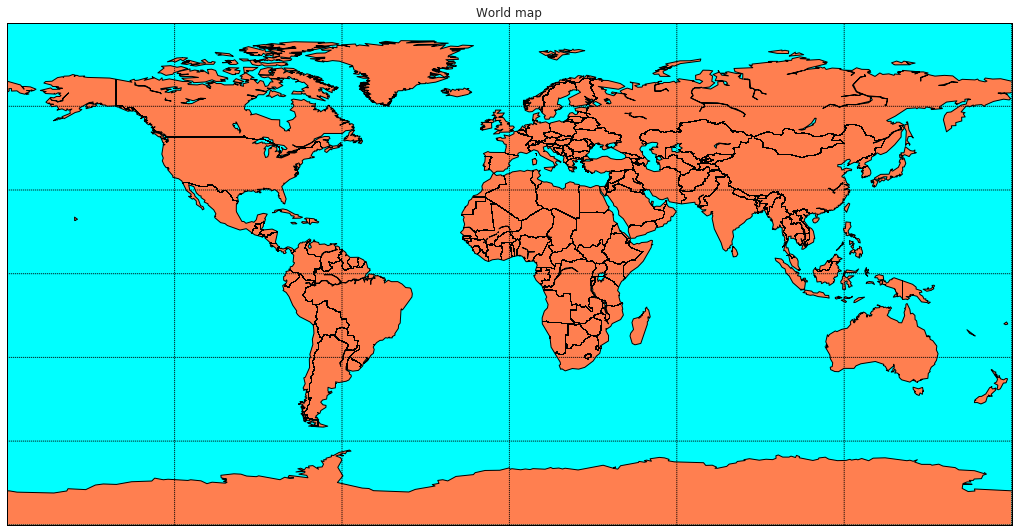

In [21]:
plt.figure(figsize = (18,25))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries(linewidth=0.25, antialiased = False) 
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,90, 30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua') 
plt.title("World map")
plt.show()

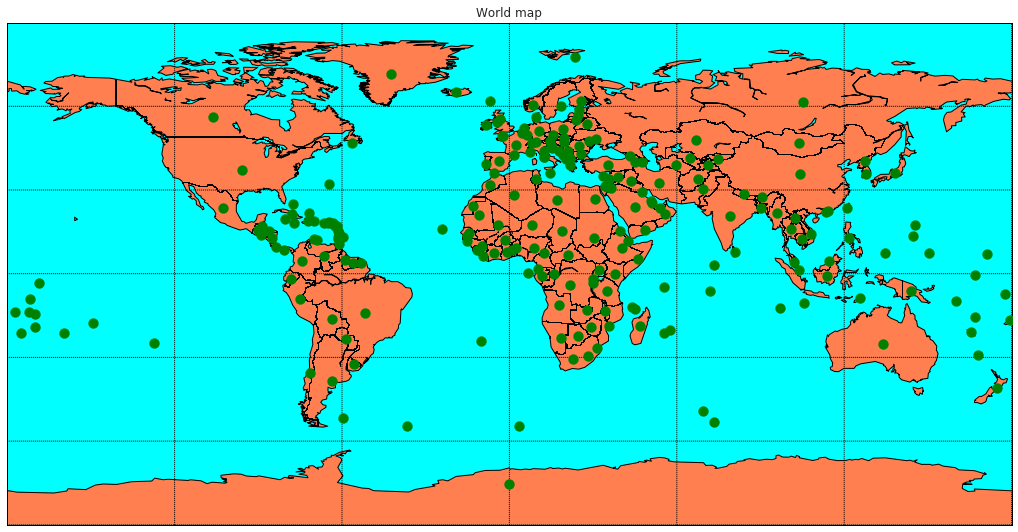

In [23]:
x1, y1 = T['longitude'], T['latitude']


plt.figure(figsize = (18,25))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries(linewidth=0.25, antialiased = False) 

m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,90, 30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua') 

m.scatter(x1, y1, marker='o', color='g', s = 100, zorder=10) 

plt.title("World map")
plt.show()

In [24]:
countries_dict = {'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
'Azerbaidjan': 'Azerbaijan',
'Brunei Darussalam': 'Brunei',
'Falkland Islands': 'Falkland Islands [Islas Malvinas]',
'Heard and McDonald Islands': 'Heard Island and McDonald Islands',
'Slovak Republic': 'Slovakia',
'Tadjikistan': 'Tajikistan',
'Vatican City State': 'Vatican City',
'Virgin Islands (British)': 'British Virgin Islands',
'Virgin Islands (USA)': 'U.S. Virgin Islands',
'Russian Federation': 'Russia',
'Polynesia (French)': 'French Polynesia',
'Pitcairn Island': 'Pitcairn Islands',
'Saint Vincent & Grenadines': 'Saint Vincent and the Grenadines',
'Reunion (French)': 'Réunion',
'Ivory Coast (Cote D\'Ivoire)': 'Côte d\'Ivoire',
'Zaire': 'Congo [DRC]',
'Macedonia': 'Macedonia [FYROM]',
'Martinique (French)': 'Martinique',
'Myanmar': 'Myanmar [Burma]',
'New Caledonia (French)': 'New Caledonia',
'S. Georgia & S. Sandwich Isls.':
'South Georgia and the South Sandwich Islands',
'Moldavia': 'Moldova',
'French Guyana': 'French Guiana',
}

In [25]:
T.name = T.name.replace(countries_dict)

In [26]:
T['Country'] =  T.name

In [27]:
survey_results.head(1)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [28]:
survey_results_groupby_country = survey_results.groupby('Country', as_index = False).count()[['Country', 'Respondent']]

In [29]:
T_new = pd.merge(T, survey_results_groupby_country , on= 'Country')

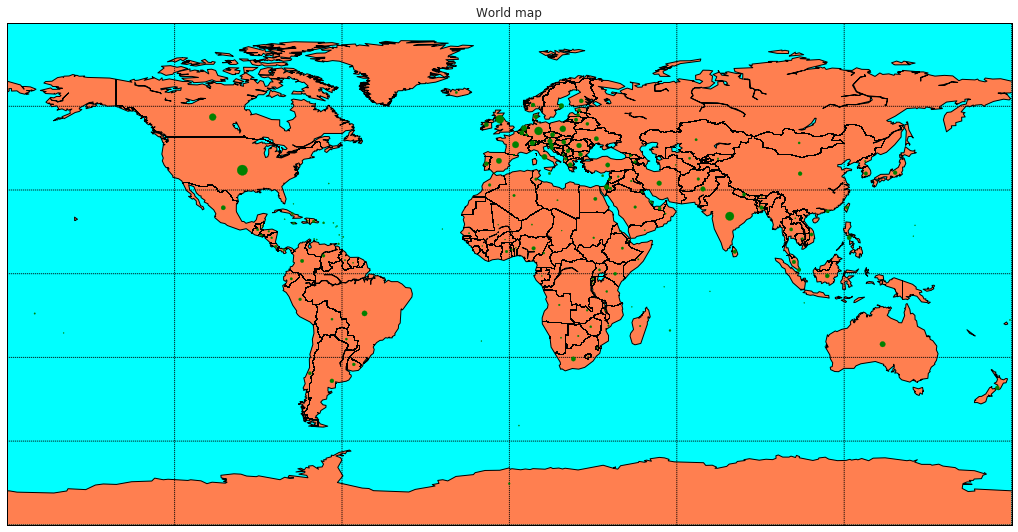

In [30]:
x1, y1 = T_new['longitude'], T_new['latitude']
number_of_resp = np.sqrt(T_new['Respondent'])

plt.figure(figsize = (18,25))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries(linewidth=0.25, antialiased = False) #antialiased - отвечает за прозрачность линий
#color = цвет континентов, lake_color = цвет озер
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,90, 30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua') # draw a line around the map region

m.scatter(x1, y1, marker='o', color='g', s = number_of_resp  , zorder=10)#, 'ro', color = color,  zorder=10, markersize=15)

plt.title("World map")
plt.show()

In [31]:
# Задача 2

In [32]:
zf = zipfile.ZipFile('./railways.zip')
files = zf.namelist()

print(files)

['railways201208.csv', 'stations.csv']


In [33]:
railways = pd.read_csv( zf.open(files[0]))

stations  = pd.read_csv( zf.open(files[1]))

In [34]:
railways.head()

,date_priem,fr_code,sto_code,stn_code,dist,weight,amount,taxsum,commodity
0,31.08.2012,1100,61400,3010,1944,202150,139005.0,25020.9000,8
1,01.08.2012,1100,61360,59250,431,265500,66608.0,11989.4400,8
2,29.08.2012,1100,81530,60530,1443,134700,74336.0,13380.4800,8
3,03.08.2012,1100,62630,1030,2150,67500,51431.0,9257.5801,8
4,02.08.2012,1100,62710,53850,1402,579150,326169.0,58710.4220,8


In [35]:
stations.head()

,stshortname,stname,stcode,stdate1,stdate2,stroadname,stroadcode,stcountry,stcountrycode
0,ВЫБОРГ-ПЕРЕВ,ВЫБОРГ-ПЕРЕВАЛКА,2340,18.09.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
1,КАЛАШНИКОВО,КАЛАШНИКОВО,6230,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
2,ДОБЫВАЛОВО,ДОБЫВАЛОВО,5510,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
3,СРЕДНЕРОГАТС,СРЕДНЕРОГАТСКАЯ,3490,16.10.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
4,ЛЕВАШОВО,ЛЕВАШОВО,3880,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643


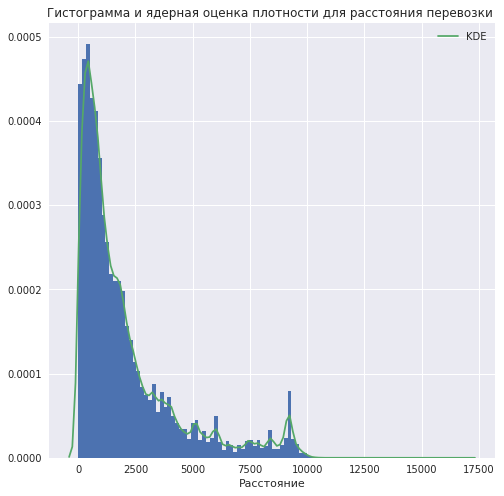

In [36]:
plt.figure( figsize = (8,8))
plt.hist (railways.dist , bins = 100, normed= True)
sns.kdeplot(  railways.dist ,   label ='KDE')
plt.title( 'Гистограмма и ядерная оценка плотности для расстояния перевозки ' )
plt.xlabel('Расстояние')
plt.show()

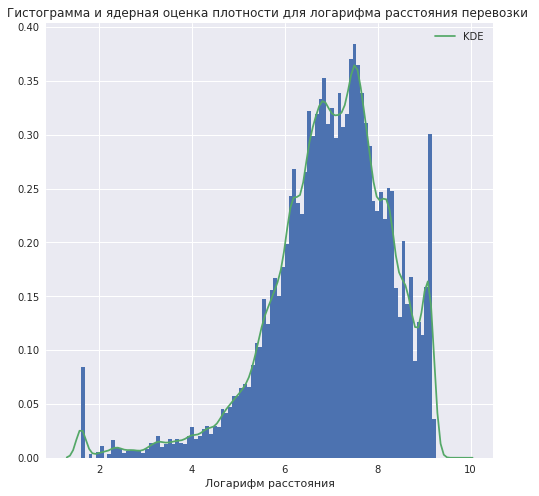

In [37]:
plt.figure( figsize = (8,8))
plt.hist ( np.log(railways.dist  ) , bins = 100, normed= True)
sns.kdeplot( np.log(railways.dist  ) , label ='KDE' )
plt.title( 'Гистограмма и ядерная оценка плотности для логарифма расстояния перевозки ' )
plt.xlabel('Логарифм расстояния')
plt.show()

In [38]:
commodity_dict = {  1 : 'Coal',
                    2 : 'Oil',
                    3 : 'Ores',
                    4 : 'Metals',
                    5 : 'Wood',
                    6 : 'Constructions',
                    7 : 'Fertilizers',
                    8 : 'Grains',
                    9 : 'Petrol',
                    10 : 'Other'}

In [39]:
commodity_dict.values()

dict_values(['Coal', 'Oil', 'Ores', 'Metals', 'Wood', 'Constructions', 'Fertilizers', 'Grains', 'Petrol', 'Other'])

In [40]:
railways.commodity = railways.commodity.replace(commodity_dict)

In [41]:
railways['log_dist'] = np.log(railways.dist  )

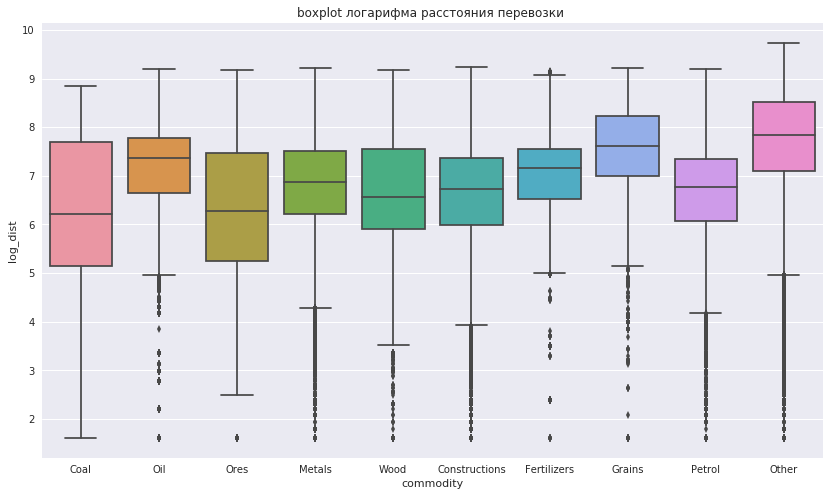

In [42]:


plt.figure( figsize = (14,8))
sns.boxplot(x="commodity", y="log_dist", data=railways, order = commodity_dict.values())

plt.title( 'boxplot логарифма расстояния перевозки ' )

plt.show()

In [43]:
medians_of_weight =   pd.DataFrame(railways.groupby( 'commodity').median()['weight']).reset_index()

In [44]:
medians_of_weight.columns = ['commodity' ,'median_weight']

In [45]:
railways = pd.merge(  railways, medians_of_weight , on = 'commodity' )

In [46]:
railways ['light_or_heavy_bin'] =  (railways.weight> railways.median_weight)*1

In [47]:
light_heavy_dict = {  0: 'Light' , 1: 'Heavy' }

In [48]:
railways ['light_or_heavy_bin'] = railways ['light_or_heavy_bin'].replace(light_heavy_dict )

In [49]:
railways.head()

,date_priem,fr_code,sto_code,stn_code,dist,weight,amount,taxsum,commodity,log_dist,median_weight,light_or_heavy_bin
0,31.08.2012,1100,61400,3010,1944,202150,139005.0,25020.9000,Grains,7.572503,67970,Heavy
1,01.08.2012,1100,61360,59250,431,265500,66608.0,11989.4400,Grains,6.066108,67970,Heavy
2,29.08.2012,1100,81530,60530,1443,134700,74336.0,13380.4800,Grains,7.274480,67970,Heavy
3,03.08.2012,1100,62630,1030,2150,67500,51431.0,9257.5801,Grains,7.673223,67970,Light
4,02.08.2012,1100,62710,53850,1402,579150,326169.0,58710.4220,Grains,7.245655,67970,Heavy


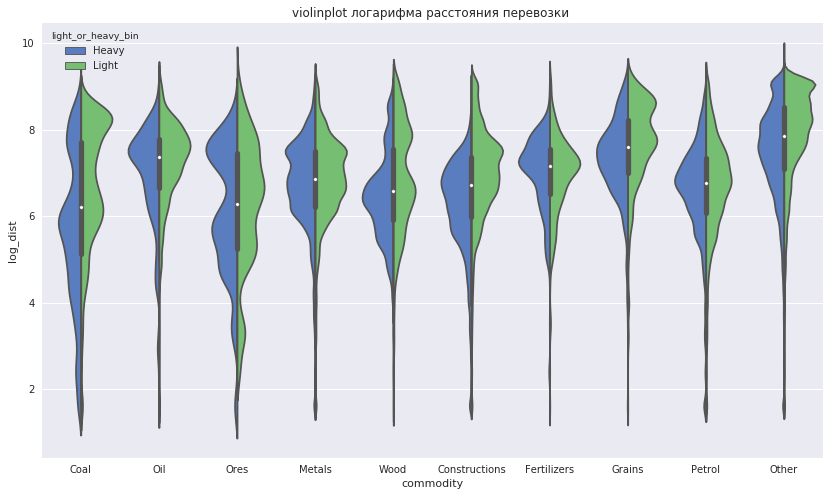

In [50]:



plt.figure( figsize = (14,8))
sns.violinplot(x="commodity", y="log_dist", hue="light_or_heavy_bin",
                    data=railways, palette="muted", split=True, order=commodity_dict.values())


plt.title( 'violinplot логарифма расстояния перевозки ' )

plt.show()

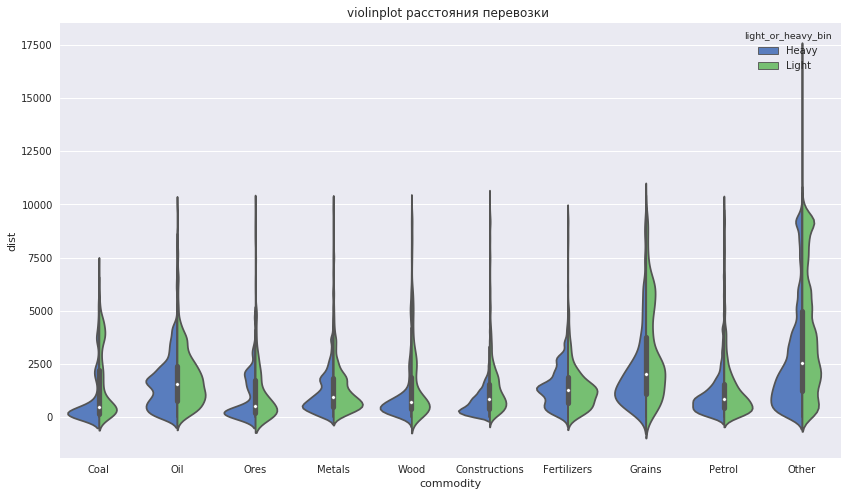

In [51]:


plt.figure( figsize = (14,8))
sns.violinplot(x="commodity", y="dist", hue="light_or_heavy_bin",
                    data=railways, palette="muted", split=True, order=commodity_dict.values())


plt.title( 'violinplot расстояния перевозки ' )

plt.show()

In [52]:
railways.head(1)

,date_priem,fr_code,sto_code,stn_code,dist,weight,amount,taxsum,commodity,log_dist,median_weight,light_or_heavy_bin
0,31.08.2012,1100,61400,3010,1944,202150,139005.0,25020.9,Grains,7.572503,67970,Heavy


In [53]:
railways['log_of_weight_dist_poduct']    = np.log(railways.weight * railways.dist)

In [54]:
railways['log_of_amount'] = np.log(railways['amount'] +1 )

In [ ]:
# если прибавить единицу

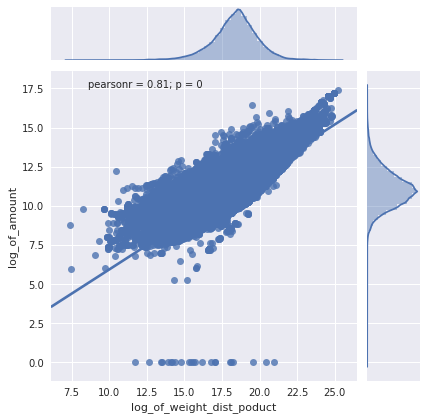

In [55]:
plt.figure( figsize = (16,16))
sns.jointplot(x="log_of_weight_dist_poduct", y="log_of_amount", data=railways, kind="reg")
plt.show()

In [ ]:
#Если убрать нулевые значения

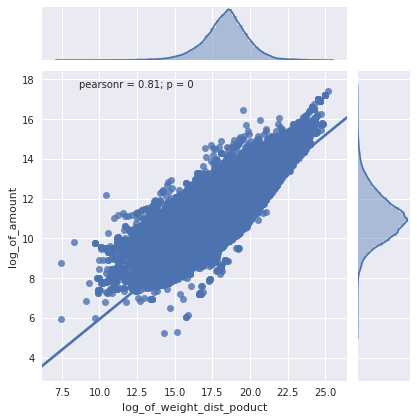

In [57]:
plt.figure( figsize = (16,16))
sns.jointplot(x="log_of_weight_dist_poduct", y="log_of_amount", data=railways[railways.log_of_amount>0   ], kind="reg")
plt.show()